<a href="https://colab.research.google.com/github/YKannikanti/Yasasri-/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Q](https://medicaldialogues.in/h-upload/2020/12/30/500x300_145030-chronic-kidney-disease.webp)


<div align="center">
      <h1></h1><h1>HDS5210</h1>
</div>

#  **PROJECT**

2024

# Abstract

Chronic Kidney Disease (CKD) is a problem that affects majority of the world population and results to significant complications if not diagnosed at the initial stage. Since identification of CKD is at an early stage it becomes easier to manage and its effects on patient outcomes can be minimized. This work is focused on improving the identification of CKD in the initial stages by using big data analytics and data visualization. In this paper, medical data are examined in search of important indicators and potential precursors of CKD that would help professionals in medicine to diagnose the disease. The project incorporates advanced graphical interfaces enhanced for displaying the significant amount of information to facilitate the ability of the healthcare practitioners to make better decisions. In conclusion, NMSHA program aims at enhanced diagnostic accuracy of CKD and timely therapeutic intercessions which is crucial for the decrease of the diseases’ impact on the patients and the health care systems.

# Introduction

Early stage identification of Chronic Kidney Disease (CKD) helps keep the condition well managed hence, the need to develop an accurate detection tool. In the sphere of healthcare, such modern technologies as advanced visualization methods can be considered as playing a crucial role in early diagnostics of CKD. This project is set to utilise data analysis methods to improve diagnostic algorithms to ultimately provide healthcare professionals with a powerful tool in early diagnosis.

It has remained a major public health issue with high likelihoods of aggravating and precipitating serious consequences. It is very advantageous if it is diagnosed early so that there are no further developments and the patient feels the effects throughout the body. It is our goal with this project to equip healthcare practitioners with an ability to gain insight on patterns, risk factors, and signs of CKD through data analysis and production of knowledge visuals.

My project is solely on identifying CKD using data features that, although might not be as conspicuous as those of other diseases, are essential indicators of CKD. Sophisticated methods of visualization will play a crucial role in providing simpler interfaces to represent the diverse natures of medical data to support decision making by the health care professionals.


# About Data, Data Retrieval and Manipulation



**Dataset 1:**

Sourced from UCI, this dataset was created by L. Rubini, P. Soundarapandian, and P. Eswaran, and was donated on July 2, 2015. It consists of 402 rows and 25 columns, with a mix of numeric and nominal features. The dataset includes variables such as age, blood pressure, specific gravity, albumin, sugar, red blood cells, pus cells, blood glucose, and more. The target variable, 'class', classifies the instances into 'ckd' or 'notckd'. The data is stored in the ARFF format and provides important health data for CKD analysis. You can explore this dataset via the [UOD Git link](https://uob-ds.github.io/cfd2021/data/chronic_kidney_disease.html) or the [alternative UCI link](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease).

---

**Dataset 2:**

This dataset, titled "Chronic Kidney Disease EHRs Abu Dhabi," is sourced from electronic medical records at Tawam Hospital in Al-Ain city, Abu Dhabi, United Arab Emirates. The data spans the period from January 1 to December 31, 2008, and includes information on 491 patients—241 women and 250 men, with an average age of 53.2 years. The dataset is in CSV format and provides valuable insights into the health records of patients diagnosed with CKD. It can be accessed through [Kaggle](https://www.kaggle.com/datasets/davidechicco/chronic-kidney-disease-ehrs-abu-dhabi) and is also referenced in a related paper available on [IEEE Xplore](https://ieeexplore.ieee.org/document/9641833/).

---

**Dataset 3:**

The "Risk Factor Prediction of Chronic Kidney Disease" dataset is sourced from Kaggle and originates from Bangladesh. Provided by Enam Medical College in Savar, Dhaka, Bangladesh, this dataset is stored in CSV format. It includes a variety of health-related features, with a focus on risk factors associated with CKD. The dataset provides insights into the relationship between various health metrics and the likelihood of developing CKD. You can find the dataset on [Kaggle](https://www.kaggle.com/datasets/joebeachcapital/risk-factor-prediction-of-chronic-kidney-disease).

# Imports

In [75]:
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Functions

In [76]:
# https://stackoverflow.com/questions/62653514/open-an-arff-file-with-scipy-io
def load_kidney_data(file_path):
    """
    Load Chronic Kidney Disease data from ARFF or CSV file into a DataFrame.

    Parameters:
    - file_path (str): Path to the ARFF or CSV file.

    Returns:
    - pd.DataFrame: DataFrame containing the kidney disease data.
    """
    if file_path.endswith('.arff'):
        data = []
        with open(file_path, "r") as f:
            for line in f:
                line = line.replace('\n', '')
                data.append(line.split(','))

        names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
                 'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc',
                 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
                 'classification', 'no_name']

        df = pd.DataFrame(data[145:], columns=names)
    elif file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    else:
        raise ValueError("Unsupported file format. Use either ARFF or CSV.")

    return df


In [77]:
def generate_scatter_plot(data, x_column, y_column, hue_column='Chronic Kidney Disease'):
    """
    Generate a scatter plot.

    Parameters:
    - data: DataFrame, the dataset
    - x_column: str, the column for the x-axis
    - y_column: str, the column for the y-axis
    - hue_column: str, the column for color-coding points (default is 'Chronic Kidney Disease')

    Returns:
    - None (displays the plot)
    """
    sns.scatterplot(data=data, x=x_column, y=y_column, hue=hue_column)
    plt.show()


# Data Preparation

In the initial phase of our project, we undertook the task of preparing our dataset sourced from UCI. The dataset was initially in ARFF format, requiring a series of preprocessing steps to align its structure with the already cleaned datasets available. This involved loading the ARFF file, performing necessary transformations, and ensuring consistency in column names and data types.

Our meticulous approach include addressing missing values, eliminating duplicate records, renaming columns for clarity, modifying specific columns to enhance interpretability, and dropping rows with missing data to ensure data integrity.

To further enhance the dataset's consistency and relevance, I systematically changed the data types of specific columns, providing a more accurate representation of the underlying information. Subsequently, I compared the original and modified versions of dataset to verify the effectiveness of our preprocessing steps.

In tandem with these efforts, I leveraged the .info method to obtain a detailed summary of the datasets, ensuring that all transformations were successfully implemented and producing the desired outcomes.

In [78]:
# Load and preprocess UCI dataset
arff_file_path = "UCI_FULL.arff"

df1 = load_kidney_data(arff_file_path)

In [79]:
# Few preprocessing steps
df1.drop('no_name', axis=1, inplace=True)

In [80]:
df1 = df1.dropna(how='all')

In [81]:
df1 = df1.iloc[:-2]

In [82]:
# Replace "?" with NaN
df1.replace('?', np.nan, inplace=True)

In [83]:
# Modifying the type of data
columns_to_convert = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo']
df1[columns_to_convert] = df1[columns_to_convert].astype(float)

In [84]:
df1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [86]:
# Define file paths for two Chronic Kidney Disease (CKD) datasets
file_path_1 = 'EHR.csv'
file_path_2 = 'CKD.csv'

# Load data from the first dataset using the custom loading function
data_1 = load_kidney_data(file_path_1)

# Load data from the second dataset using the same custom loading function
data_2 = load_kidney_data(file_path_2)


In [87]:
data_2.shape

(202, 29)

In [88]:
# Handling missing values
df1.dropna(inplace=True)  # Drop rows with missing values
data_1.dropna(inplace=True)
data_2.dropna(inplace=True)

In [89]:
data_1.shape

(491, 22)

In [90]:
# Check
data_2.shape

(201, 29)

In [91]:
data_1

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
0,0,64,0,0,0,0,1,1,1,1,...,0,4.80,59.0,93.3,144,87,40,98,0,8
1,0,52,0,0,0,0,1,1,1,0,...,0,6.40,52.0,105.8,148,91,45,106,0,9
2,0,56,0,0,0,0,1,1,1,1,...,0,6.40,57.0,99.8,149,86,41,88,0,7
3,0,58,0,0,0,0,0,1,1,1,...,0,5.10,65.0,90.3,116,68,32,103,0,9
4,0,63,1,0,0,0,1,1,1,1,...,1,5.00,70.0,79.7,132,63,31,105,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1,25,0,0,0,0,0,0,0,0,...,0,5.30,73.0,122.6,127,74,24,102,0,9
487,1,45,0,0,0,0,1,0,1,0,...,0,5.90,67.0,110.3,150,112,33,94,0,8
488,1,44,1,0,0,0,0,1,1,1,...,0,6.41,66.3,111.6,126,83,35,0,0,0
489,1,41,0,0,1,1,1,1,0,1,...,1,4.00,93.0,87.6,119,66,22,35,1,3


In [92]:
# Rename the column 'HistoryHTN ' to 'HistoryHTN' in the dataset (data_1)
data_1.rename(columns={'HistoryHTN ': 'HistoryHTN'}, inplace=True)

In [93]:
columns_data_1 = ['HistoryDiabetes', 'HistoryCHD', 'HistoryVascular', 'HistorySmoking', 'HistoryHTN', 'HistoryDLD', 'HistoryObesity']

# Replace 1 with 'Yes' and 0 with 'No' in the specified columns
data_1[columns_data_1] = data_1[columns_data_1].replace({1: 'yes', 0: 'no'})

In [94]:
# Check
data_1['HistoryDiabetes'].unique()

array(['no', 'yes'], dtype=object)

In [95]:
df1.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [96]:
# Rename the columns of df1 using the specified feature names
feature_df1=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']

df1.columns = feature_df1

In [97]:
df1

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [98]:
# Check
data_1.columns

Index(['Sex', 'AgeBaseline', 'HistoryDiabetes', 'HistoryCHD',
       'HistoryVascular', 'HistorySmoking', 'HistoryHTN', 'HistoryDLD',
       'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB',
       'CholesterolBaseline', 'CreatinineBaseline', 'eGFRBaseline',
       'sBPBaseline', 'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths',
       'EventCKD35', 'TIME_YEAR'],
      dtype='object')

In [99]:
# Rename the 'AgeBaseline' column to 'Age (yrs)' in data_1
data_1.rename(columns={'AgeBaseline': 'Age (yrs)'}, inplace=True)

In [100]:
# Check
data_1.columns

Index(['Sex', 'Age (yrs)', 'HistoryDiabetes', 'HistoryCHD', 'HistoryVascular',
       'HistorySmoking', 'HistoryHTN', 'HistoryDLD', 'HistoryObesity',
       'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB', 'CholesterolBaseline',
       'CreatinineBaseline', 'eGFRBaseline', 'sBPBaseline', 'dBPBaseline',
       'BMIBaseline', 'TimeToEventMonths', 'EventCKD35', 'TIME_YEAR'],
      dtype='object')

In [101]:
data_2

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
5,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,2,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,1,1,0,0,0,1,26.6175 - 51.7832,s3,1,≥ 74
198,0,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,1,0,0,0,1,< 26.6175,s4,1,≥ 74
199,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,51.7832 - 76.949,s2,0,≥ 74
200,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,102.115 - 127.281,s1,0,≥ 74


In [102]:
# Drop the first row (index 0) from data_2
data_2.drop(0, axis=0, inplace=True)

In [103]:
# Check
data_2

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
5,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
6,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,2,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,1,1,0,0,0,1,26.6175 - 51.7832,s3,1,≥ 74
198,0,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,1,0,0,0,1,< 26.6175,s4,1,≥ 74
199,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,51.7832 - 76.949,s2,0,≥ 74
200,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,102.115 - 127.281,s1,0,≥ 74


In [104]:
data_2.columns

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'affected', 'age'],
      dtype='object')

In [105]:
columns_data_2 = ['htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [106]:
# Convert specific columns in data_2 to integer type
data_2[columns_data_2] = data_2[columns_data_2].astype(int)

In [107]:
# Replace 1 with 'Yes' and 0 with 'No' in the specified columns
data_2[columns_data_2] = data_2[columns_data_2].replace({1: 'yes', 0: 'no'})

In [108]:
# Check
data_2['htn'].unique()

array(['no', 'yes'], dtype=object)

In [109]:
# Checking unique values in specified columns
columns_to_int = ['bp (Diastolic)', 'bp limit', 'rbc', 'pc', 'pcc', 'ba', 'affected']

for column in columns_to_int:
    unique_values = data_2[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in bp (Diastolic): ['0' '1']
Unique values in bp limit: ['0' '1' '2']
Unique values in rbc: ['0' '1']
Unique values in pc: ['0' '1']
Unique values in pcc: ['0' '1']
Unique values in ba: ['0' '1']
Unique values in affected: ['1' '0']


In [110]:
# Converting specified columns to integer type
data_2[columns_to_int] = data_2[columns_to_int].astype(int)

In [111]:
# Check
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 2 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  200 non-null    int64 
 1   bp limit        200 non-null    int64 
 2   sg              200 non-null    object
 3   al              200 non-null    object
 4   class           200 non-null    object
 5   rbc             200 non-null    int64 
 6   su              200 non-null    object
 7   pc              200 non-null    int64 
 8   pcc             200 non-null    int64 
 9   ba              200 non-null    int64 
 10  bgr             200 non-null    object
 11  bu              200 non-null    object
 12  sod             200 non-null    object
 13  sc              200 non-null    object
 14  pot             200 non-null    object
 15  hemo            200 non-null    object
 16  pcv             200 non-null    object
 17  rbcc            200 non-null    object
 18  wbcc           

In [112]:
# Dropping duplicate rows from dataframes
df1 = df1.drop_duplicates()
data_1 = data_1.drop_duplicates()
data_2 = data_2.drop_duplicates()

In [113]:
# Dropping rows with missing values from dataframes
df1 = df1.dropna()
data_1 = data_1.dropna()
data_2 = data_2.dropna()

In [114]:
# Resetting the index of dataframes
data_2.reset_index(drop=True, inplace=True)
df1.reset_index(drop=True, inplace=True)

In [115]:
# dataframe.size
size_df1 = df1.size
size_data_1 = data_1.size
size_data_2 = data_2.size
# printing size
print("Size of df1 = {}".format(size_df1))
print("Size of data_2 = {}".format(size_data_1))
print("Size of data_2 = {}".format(size_data_2))

Size of df1 = 3950
Size of data_2 = 10802
Size of data_2 = 5800


In [116]:
# Check
df1

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
154,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
155,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
156,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


# Descriptive Statistics and Final Dataset


In this step, I comprehensively understand each of the three datasets through descriptive statistics. Utilizing the describe function, we extract key statistical measures such as count, maximum, and minimum values for each dataset. This exploration provides insights into the distribution and characteristics of the data.

Next, I performed a comparative analysis to identify common values across all three datasets. This step aims to uncover shared features that may facilitate seamless integration. Additionally, I assess the dimensions of each dataset using the ndim attribute to ensure consistency in structure.

Finally, armed with a comprehensive understanding of the individual datasets, I combine them into a unified dataframe. Employing merging techniques, I create a cohesive dataset that amalgamates information from each source. This merged dataframe serves as a foundation for subsequent analyses.

In [117]:
df1.describe()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),Hemoglobin (gms)
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000


In [118]:
data_1.describe()

,Sex,Age (yrs),DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.509165,53.203666,0.551935,0.327902,0.617108,0.446029,4.978574,67.856823,98.116090,131.374745,76.871690,30.183299,83.065173,0.114053,6.940937
std,0.500426,13.821282,0.497803,0.469928,0.486588,0.497586,1.096702,17.918627,18.503267,15.692650,10.711134,6.236742,26.011140,0.318200,2.201710
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,2.230000,6.000000,60.000000,92.000000,41.000000,13.000000,0.000000,0.000000,0.000000
25%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,4.200000,55.000000,86.400000,121.000000,69.000000,26.000000,77.000000,0.000000,6.000000
50%,1.000000,54.000000,1.000000,0.000000,1.000000,0.000000,5.000000,66.000000,98.100000,131.000000,77.000000,30.000000,93.000000,0.000000,8.000000
75%,1.000000,64.000000,1.000000,1.000000,1.000000,1.000000,5.770000,78.500000,109.500000,141.000000,83.000000,33.000000,100.000000,0.000000,8.000000
max,1.000000,89.000000,1.000000,1.000000,1.000000,1.000000,9.300000,123.000000,242.600000,180.000000,112.000000,57.000000,111.000000,1.000000,9.000000


In [119]:
data_2.describe()

,bp (Diastolic),bp limit,rbc,pc,pcc,ba,affected
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,0.540000,0.755000,0.125000,0.22500,0.135000,0.055000,0.640000
std,0.499648,0.805119,0.331549,0.41863,0.342581,0.228552,0.481205
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,1.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [120]:
df1.ndim

2

In [121]:
data_1.ndim

2

In [122]:
data_2.ndim

2

In [123]:
# Merging df1 and data_1 using a outer merge
final_df = pd.merge(df1, data_1, on='Age (yrs)', how='left')

In [124]:
# Merging the result with data_2 using a left merge
final_df = pd.merge(final_df, data_2, left_on='Chronic Kidney Disease', right_on='class', how='left')

In [125]:
# Display the merged DataFrame
final_df.head()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,no,no,no,no,no,no,≥ 227.944,s1,1.0,< 12
1,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,no,no,no,no,no,no,≥ 227.944,s1,1.0,< 12
2,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,no,no,no,yes,no,no,127.281 - 152.446,s1,1.0,< 12
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,no,no,no,no,no,no,127.281 - 152.446,s1,1.0,< 12
4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,no,yes,no,yes,yes,no,127.281 - 152.446,s1,1.0,12 - 20


In [126]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129269 entries, 0 to 129268
Data columns (total 75 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age (yrs)                       129269 non-null  float64
 1   Blood Pressure (mm/Hg)          129269 non-null  float64
 2   Specific Gravity                129269 non-null  float64
 3   Albumin                         129269 non-null  float64
 4   Sugar                           129269 non-null  float64
 5   Red Blood Cells                 129269 non-null  object 
 6   Pus Cells                       129269 non-null  object 
 7   Pus Cell Clumps                 129269 non-null  object 
 8   Bacteria                        129269 non-null  object 
 9   Blood Glucose Random (mgs/dL)   129269 non-null  float64
 10  Blood Urea (mgs/dL)             129269 non-null  float64
 11  Serum Creatinine (mgs/dL)       129269 non-null  float64
 12  Sodium (mEq/L)  

In [127]:
# Final touch
# List of columns to convert to float
float_list = ['Packed Cell Volume', 'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)']

# Convert the specified columns to float
final_df[float_list] = final_df[float_list].astype(float)

# Analysis



This section of the project focuses on utilizing the power of data visualization and analysis to extract valuable insights from the collected data. By visually representing and statistically analyzing the relationships between various features and the presence or absence of Chronic Kidney Disease (CKD), we aim to uncover patterns and trends that can potentially improve diagnostic efficiency for early detection of CKD.

Through visualization techniques, such as scatter plots and boxplots, we can explore the relationships between different features and observe how they vary between individuals diagnosed with CKD and those without. This visual exploration allows us to identify potential correlations and trends that might not be readily apparent from the raw data alone.

Furthermore, statistical analysis methods can be employed to quantify the strength and significance of these relationships. This quantitative approach provides deeper insights into the data and allows for more objective interpretations of the observed trends.


In [128]:
data = final_df

In [129]:
data.shape

(129269, 75)

In [130]:
numeric= []
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)

numeric = numeric + ['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']

In [131]:
remove = ['rbc', 'pc', 'pcc', 'ba', 'affected',  'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB', 'TimeToEventMonths', 'EventCKD35', 'TIME_YEAR',  'bp (Diastolic)', 'bp limit']

# Remove specified columns from the original list
numeric = [col for col in numeric if col not in remove]

In [132]:
len(numeric)

24

In [133]:
numeric

['Age (yrs)',
 'Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)',
 'Sex',
 'CholesterolBaseline',
 'CreatinineBaseline',
 'eGFRBaseline',
 'sBPBaseline',
 'dBPBaseline',
 'BMIBaseline',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)']

In [134]:
categoricals=[]
for col in data.columns:
    if not col in numeric and remove:
        categoricals.append(col)

categoricals.remove('class')

In [135]:
remove_1 =['DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB', 'TimeToEventMonths', 'EventCKD35', 'TIME_YEAR']

# Remove specified columns from the original list
categoricals = [col for col in categoricals if col not in remove_1]
categoricals = categoricals[:17]

In [136]:
categoricals

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Chronic Kidney Disease',
 'HistoryDiabetes',
 'HistoryCHD',
 'HistoryVascular',
 'HistorySmoking',
 'HistoryHTN',
 'HistoryDLD']

## Distributions of Numerical Features

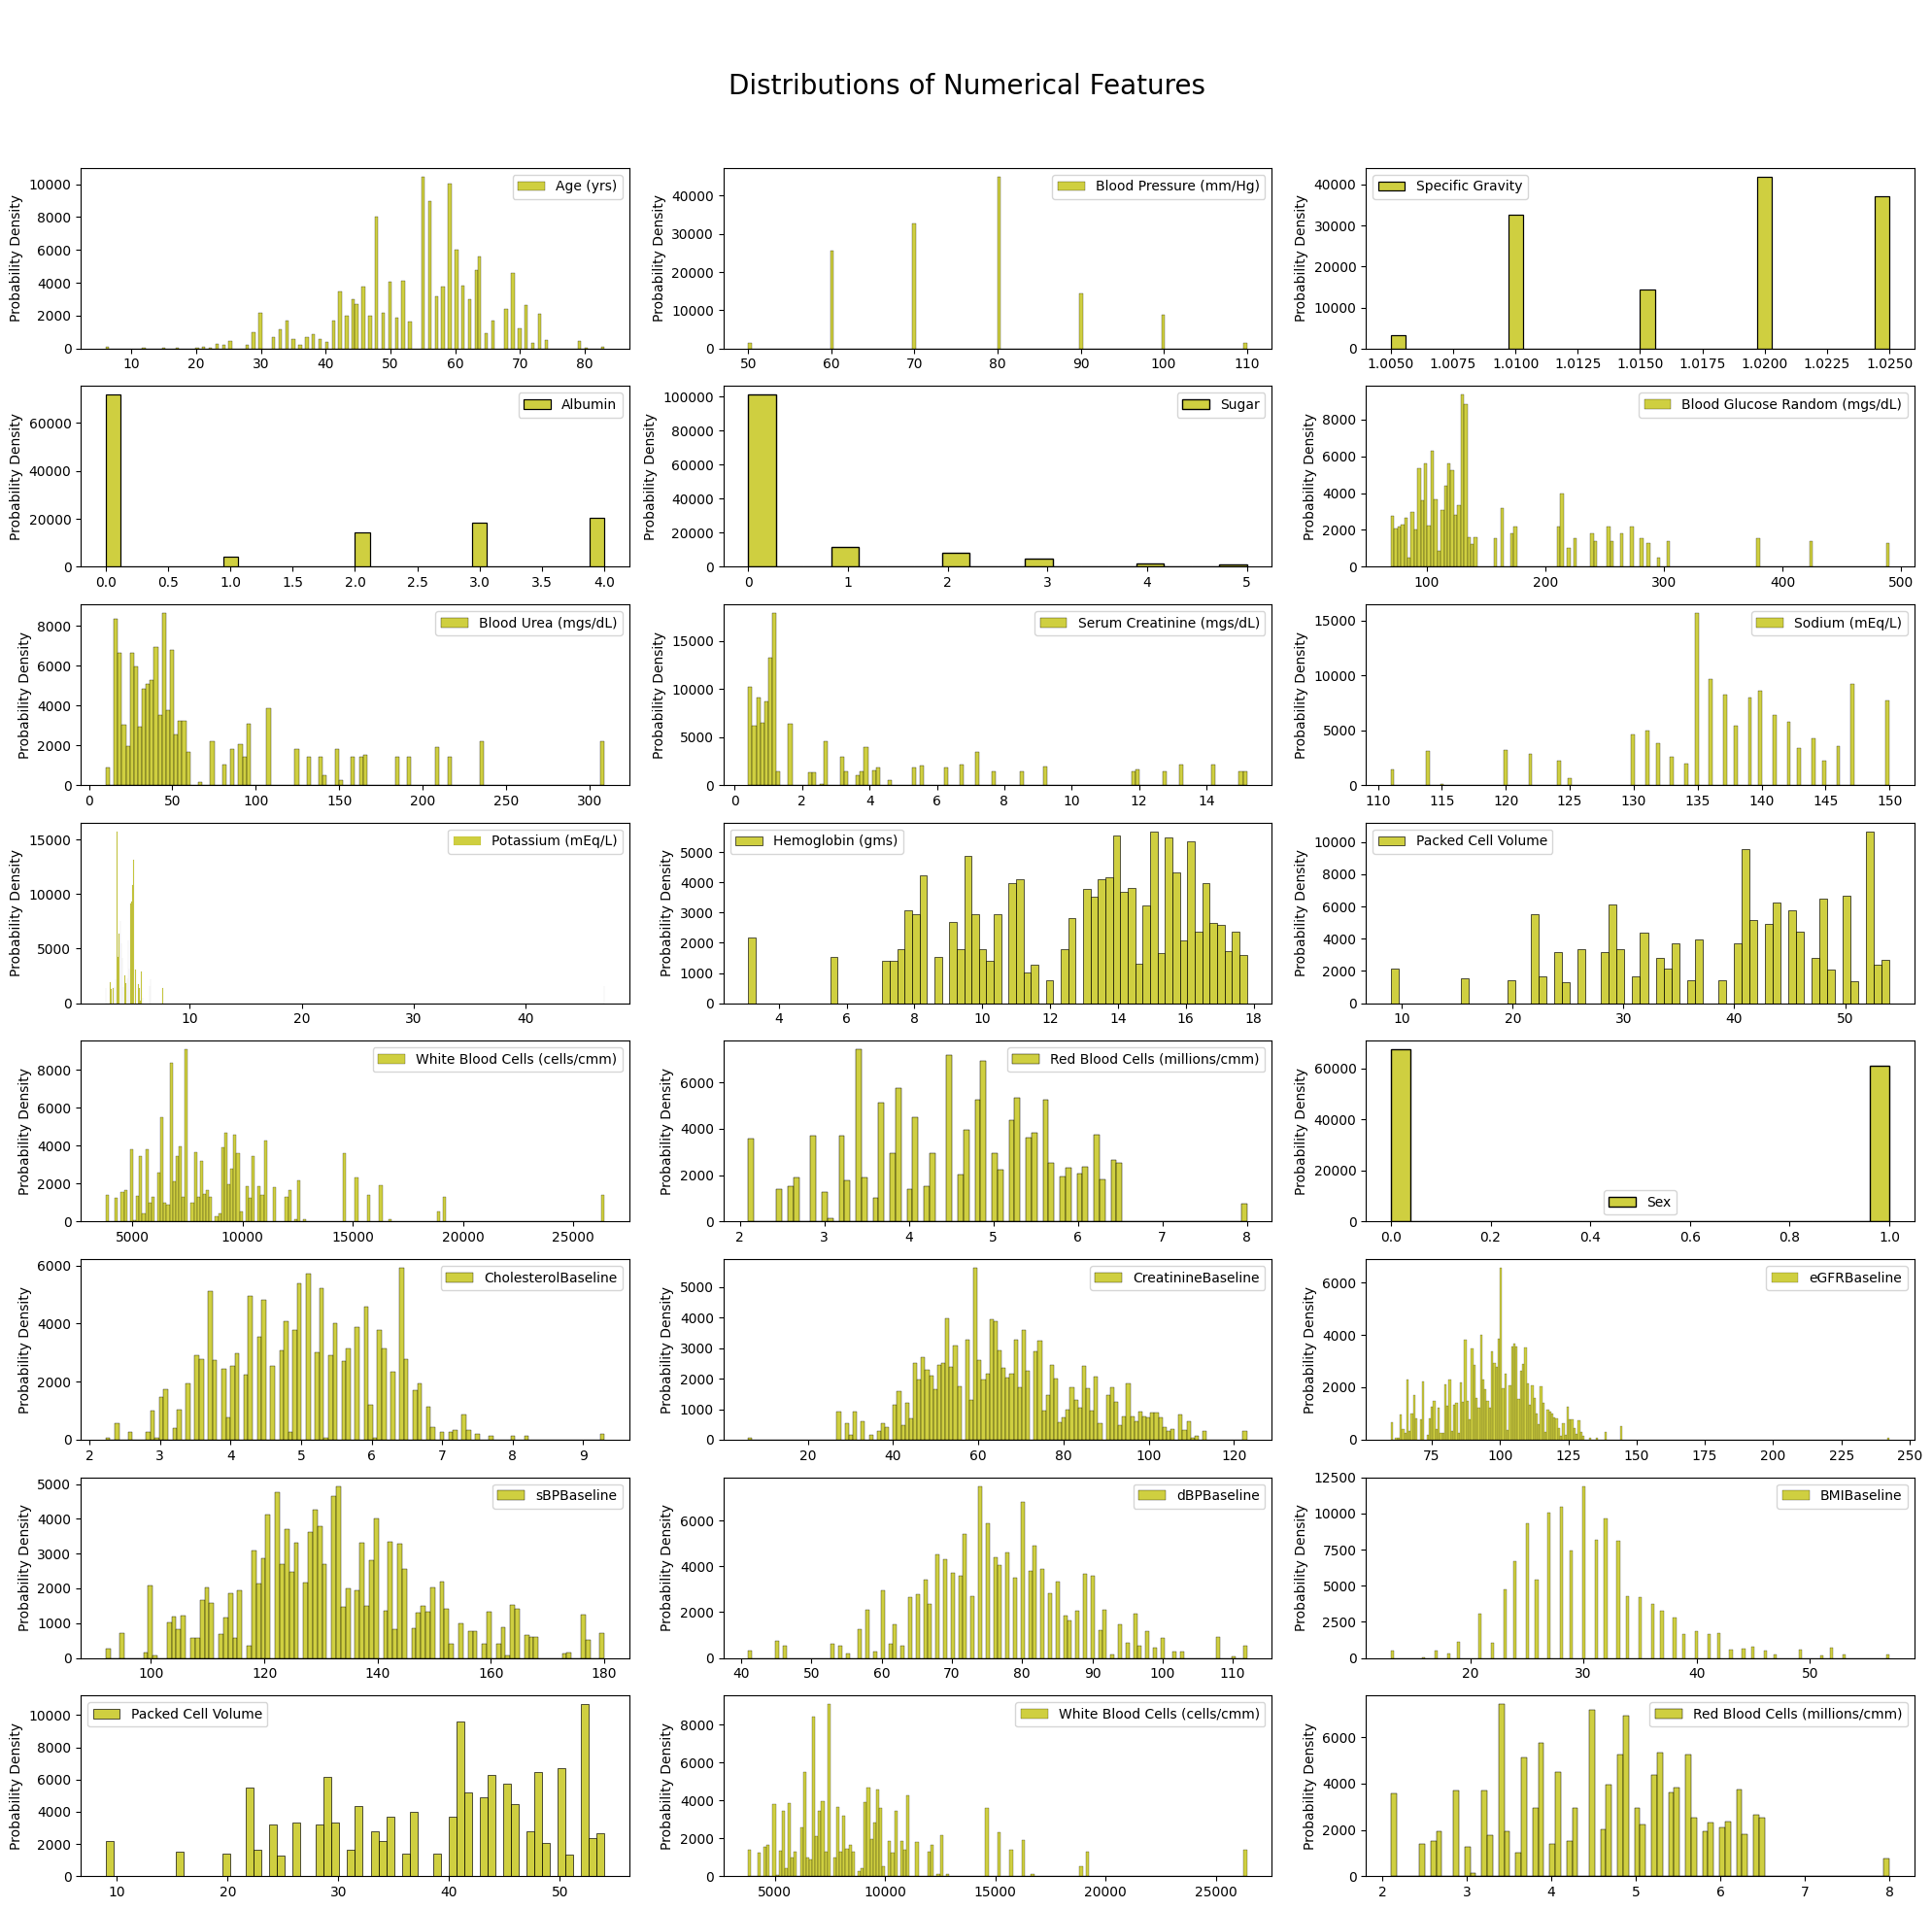

In [137]:
row, col = (8, 3)

figure, axes = plt.subplots(nrows= row, ncols= col, figsize=(20, 20))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=20)

for i, column_n in enumerate(numeric):

    i, j = (i // col), (i % col)
    label = column_n
    fig = sns.histplot(data[column_n], color= "y", label= label, ax=axes[i, j], kde_kws={"lw": 4})
    fig = fig.legend(loc='best', fontsize=10)

    axes[i, j].set_ylabel("Probability Density", fontsize='medium')
    axes[i, j].set_xlabel(None)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # For better spacing
plt.show()

In this visualization, each subplot represents the distribution of a numerical feature in the merged dataset. The y-axis represents the probability density, and the x-axis corresponds to the values of the respective numerical feature. Let's discuss a few notable observations:

1. **Age (yrs):** The histogram of age shows a normal distribution, with the median age falling in the 30-40 age group. This means that half of the people in the data set are younger than 40 and half are older than 40. The distribution is also relatively symmetric, with the same number of people in each age group on either side of the median. This suggests that the data is evenly distributed and there are no major outliers.

2. **Blood Glucose Random (mgs/dL):** The histogram of blood glucose random shows a skewed distribution, with a long tail to the right. This means that there are more people with high blood glucose levels than there are people with low blood glucose levels. The distribution is also positively skewed, meaning that the tail to the right is longer than the tail to the left. This suggests that there are a few people with very high blood glucose levels.

3. **Potassium (mEq/L):** The histogram of potassium shows a normal distribution, with the median potassium level falling in the 3.5-4.5 mEq/L range. This means that half of the people in the data set have potassium levels below 4.5 mEq/L and half have potassium levels above 4.5 mEq/L. The distribution is also relatively symmetric, with the same number of people in each potassium level group on either side of the median. This suggests that the data is evenly distributed and there are no major outliers. Same goes to Serum Creatinine (mgs/dL)

However, there are a few outliers in the data, which are points that fall far outside of the main distribution. These outliers could be due to a variety of factors, such as medical conditions, medications, or errors in data collection. Most of the data is normally if we exclude ouliers and also some of them are skewed




## Distributions of Categorical Features

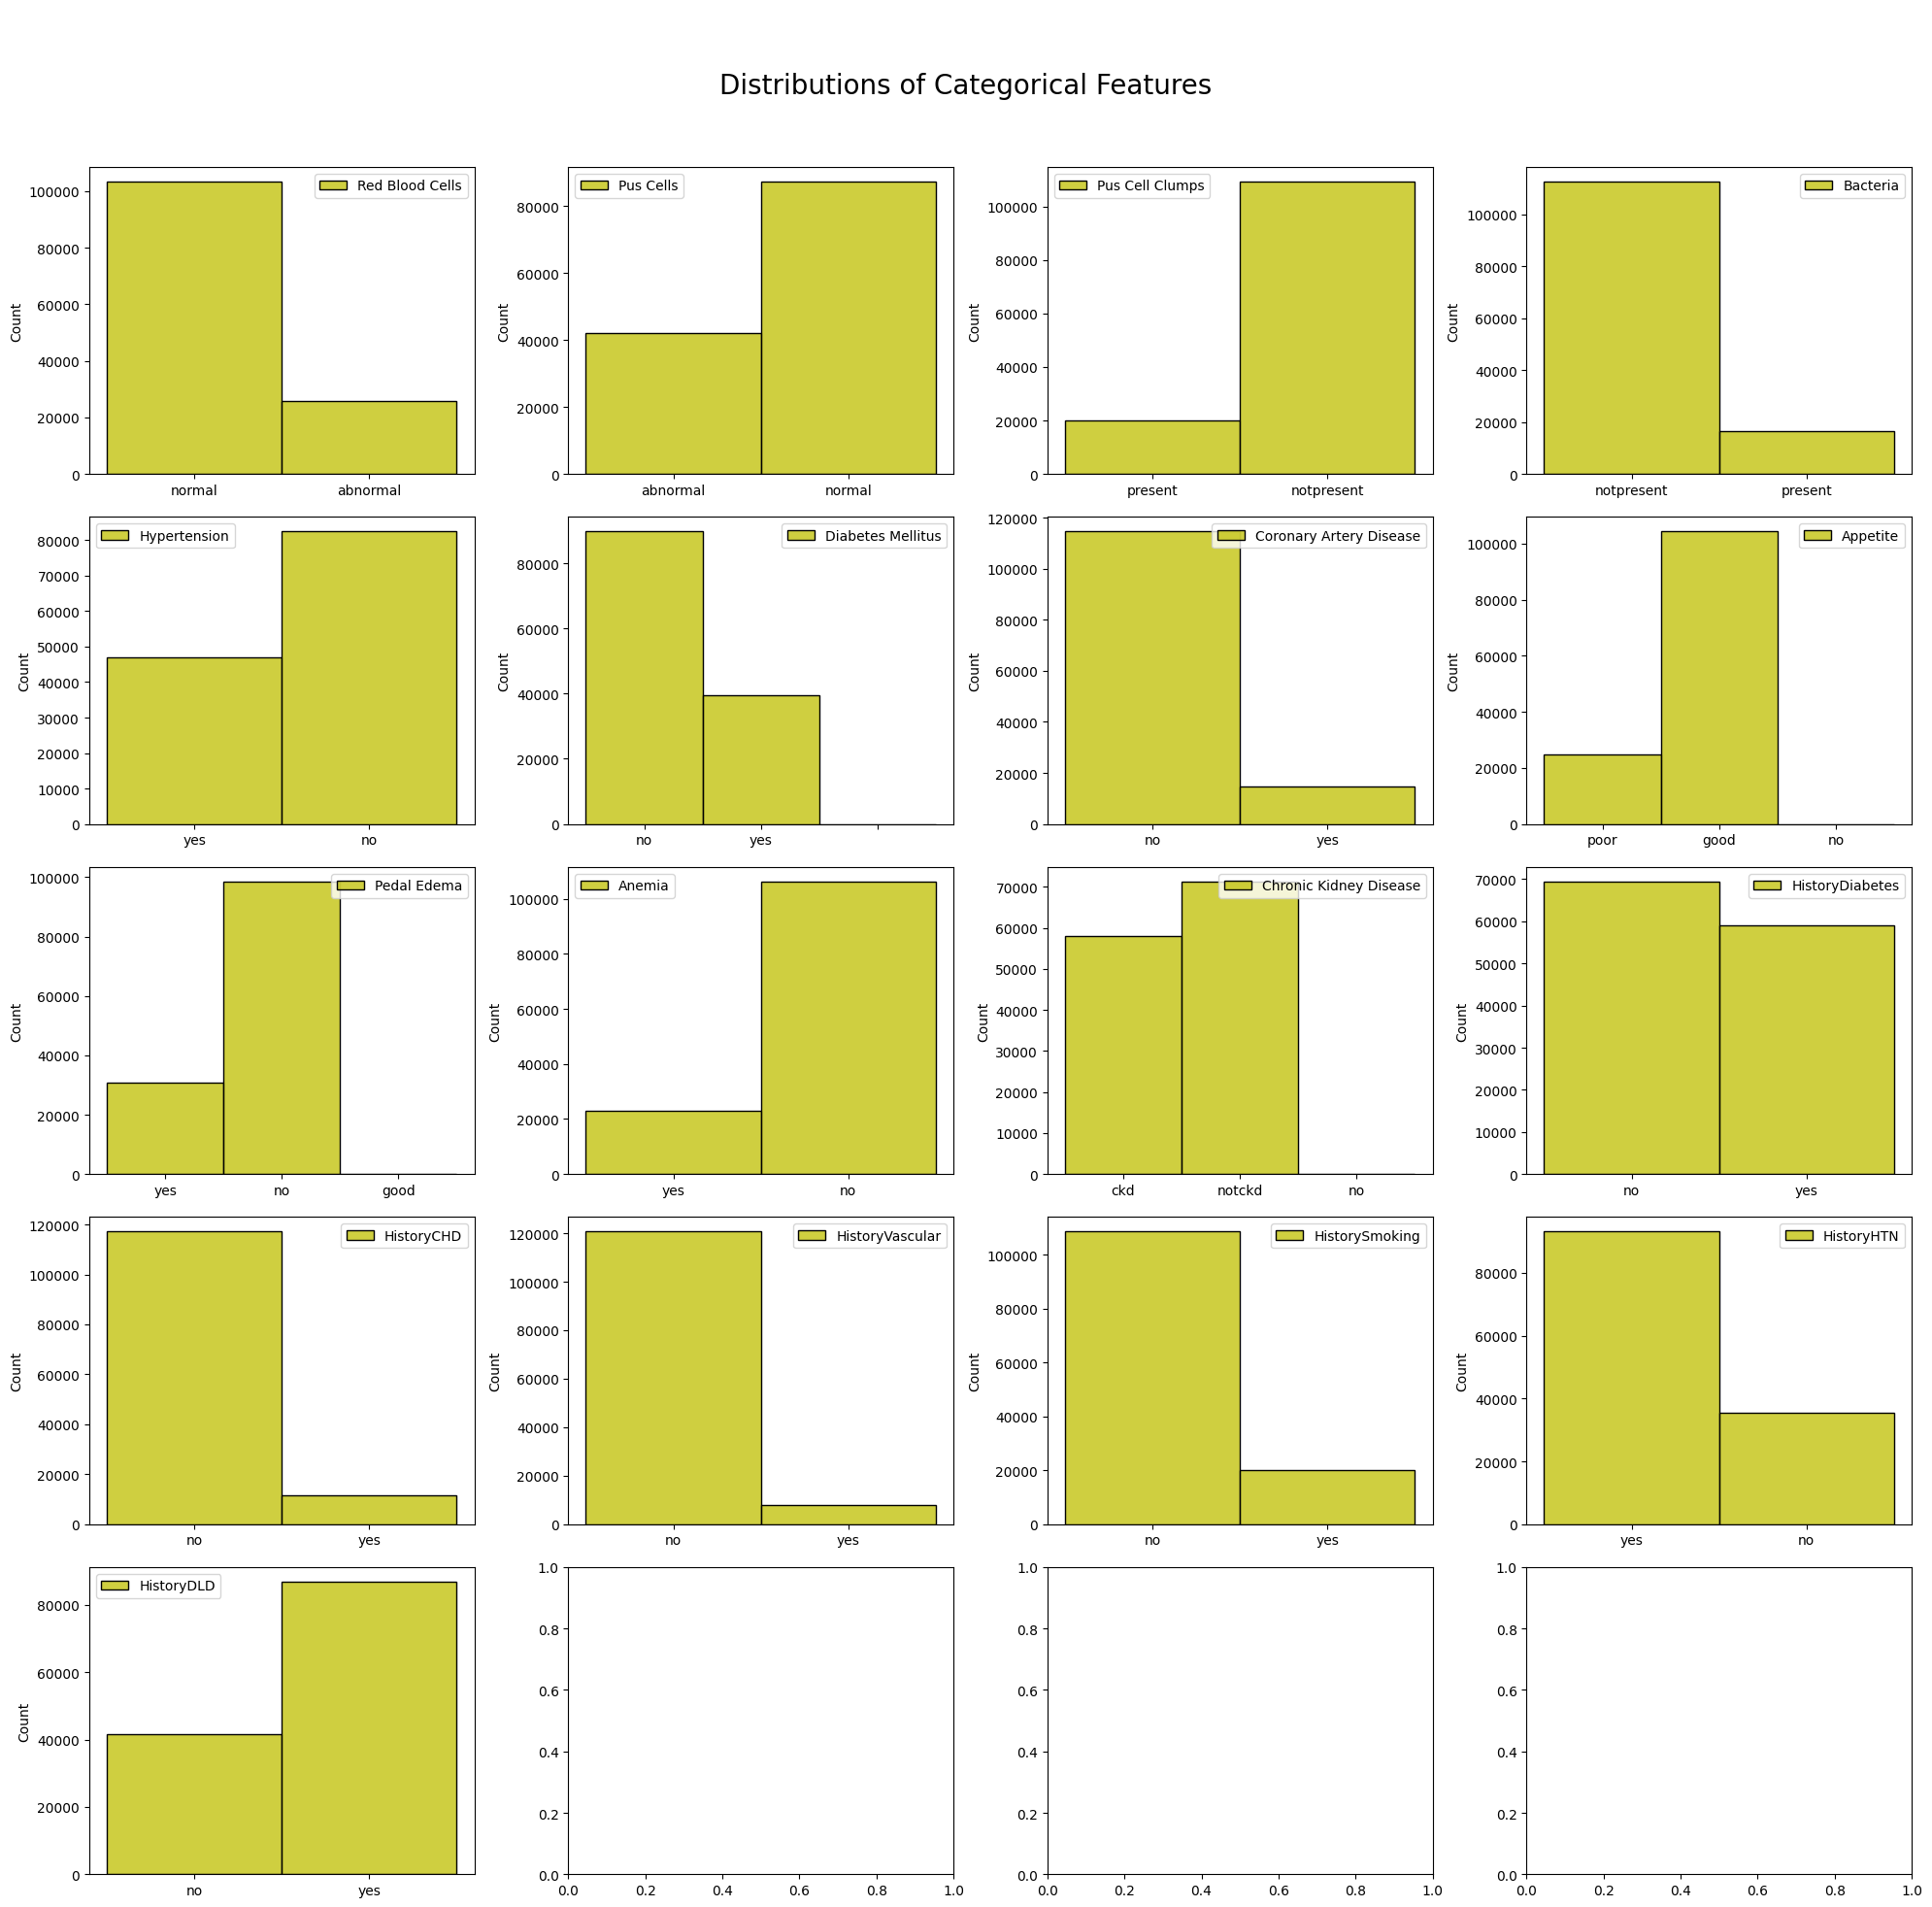

In [138]:
row, col = (5, 4)

figure, axes = plt.subplots(nrows= row, ncols= col, figsize=(20, 20))
figure.suptitle('\n\nDistributions of Categorical Features', fontsize=20)

for i, column_n in enumerate(categoricals):

    i, j = (i // col), (i % col)
    label = column_n
    fig = sns.histplot(data[column_n], color= "y", label= label, ax=axes[i, j], kde_kws={"lw": 4})
    fig = fig.legend(loc='best', fontsize=10)

    axes[i, j].set_ylabel("Count", fontsize='medium')
    axes[i, j].set_xlabel(None)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # For better spacing
plt.show()


Chronic Kidney Disease (CKD) :There is a less imbalance in the number of patients with CKD and those without CKD, with many more patients in the CKD group. This means that the data is not evenly distributed but fair

Anemia:
The data on anemia is also very imbalanced, with more patients testing negative for anemia than positive. This imbalance is also present in the history datasets for diabetes, CHD, vascular disease, smoking, hypertension, and red blood cells.
"Red Blood Cells" is also very imbalanced

Overall:
The majority of the features in the data set are imbalanced, with fewer patients having abnormal counts than normal counts. The small percentage of yes count or abnormal count are the very important data from the features.


## Correlation

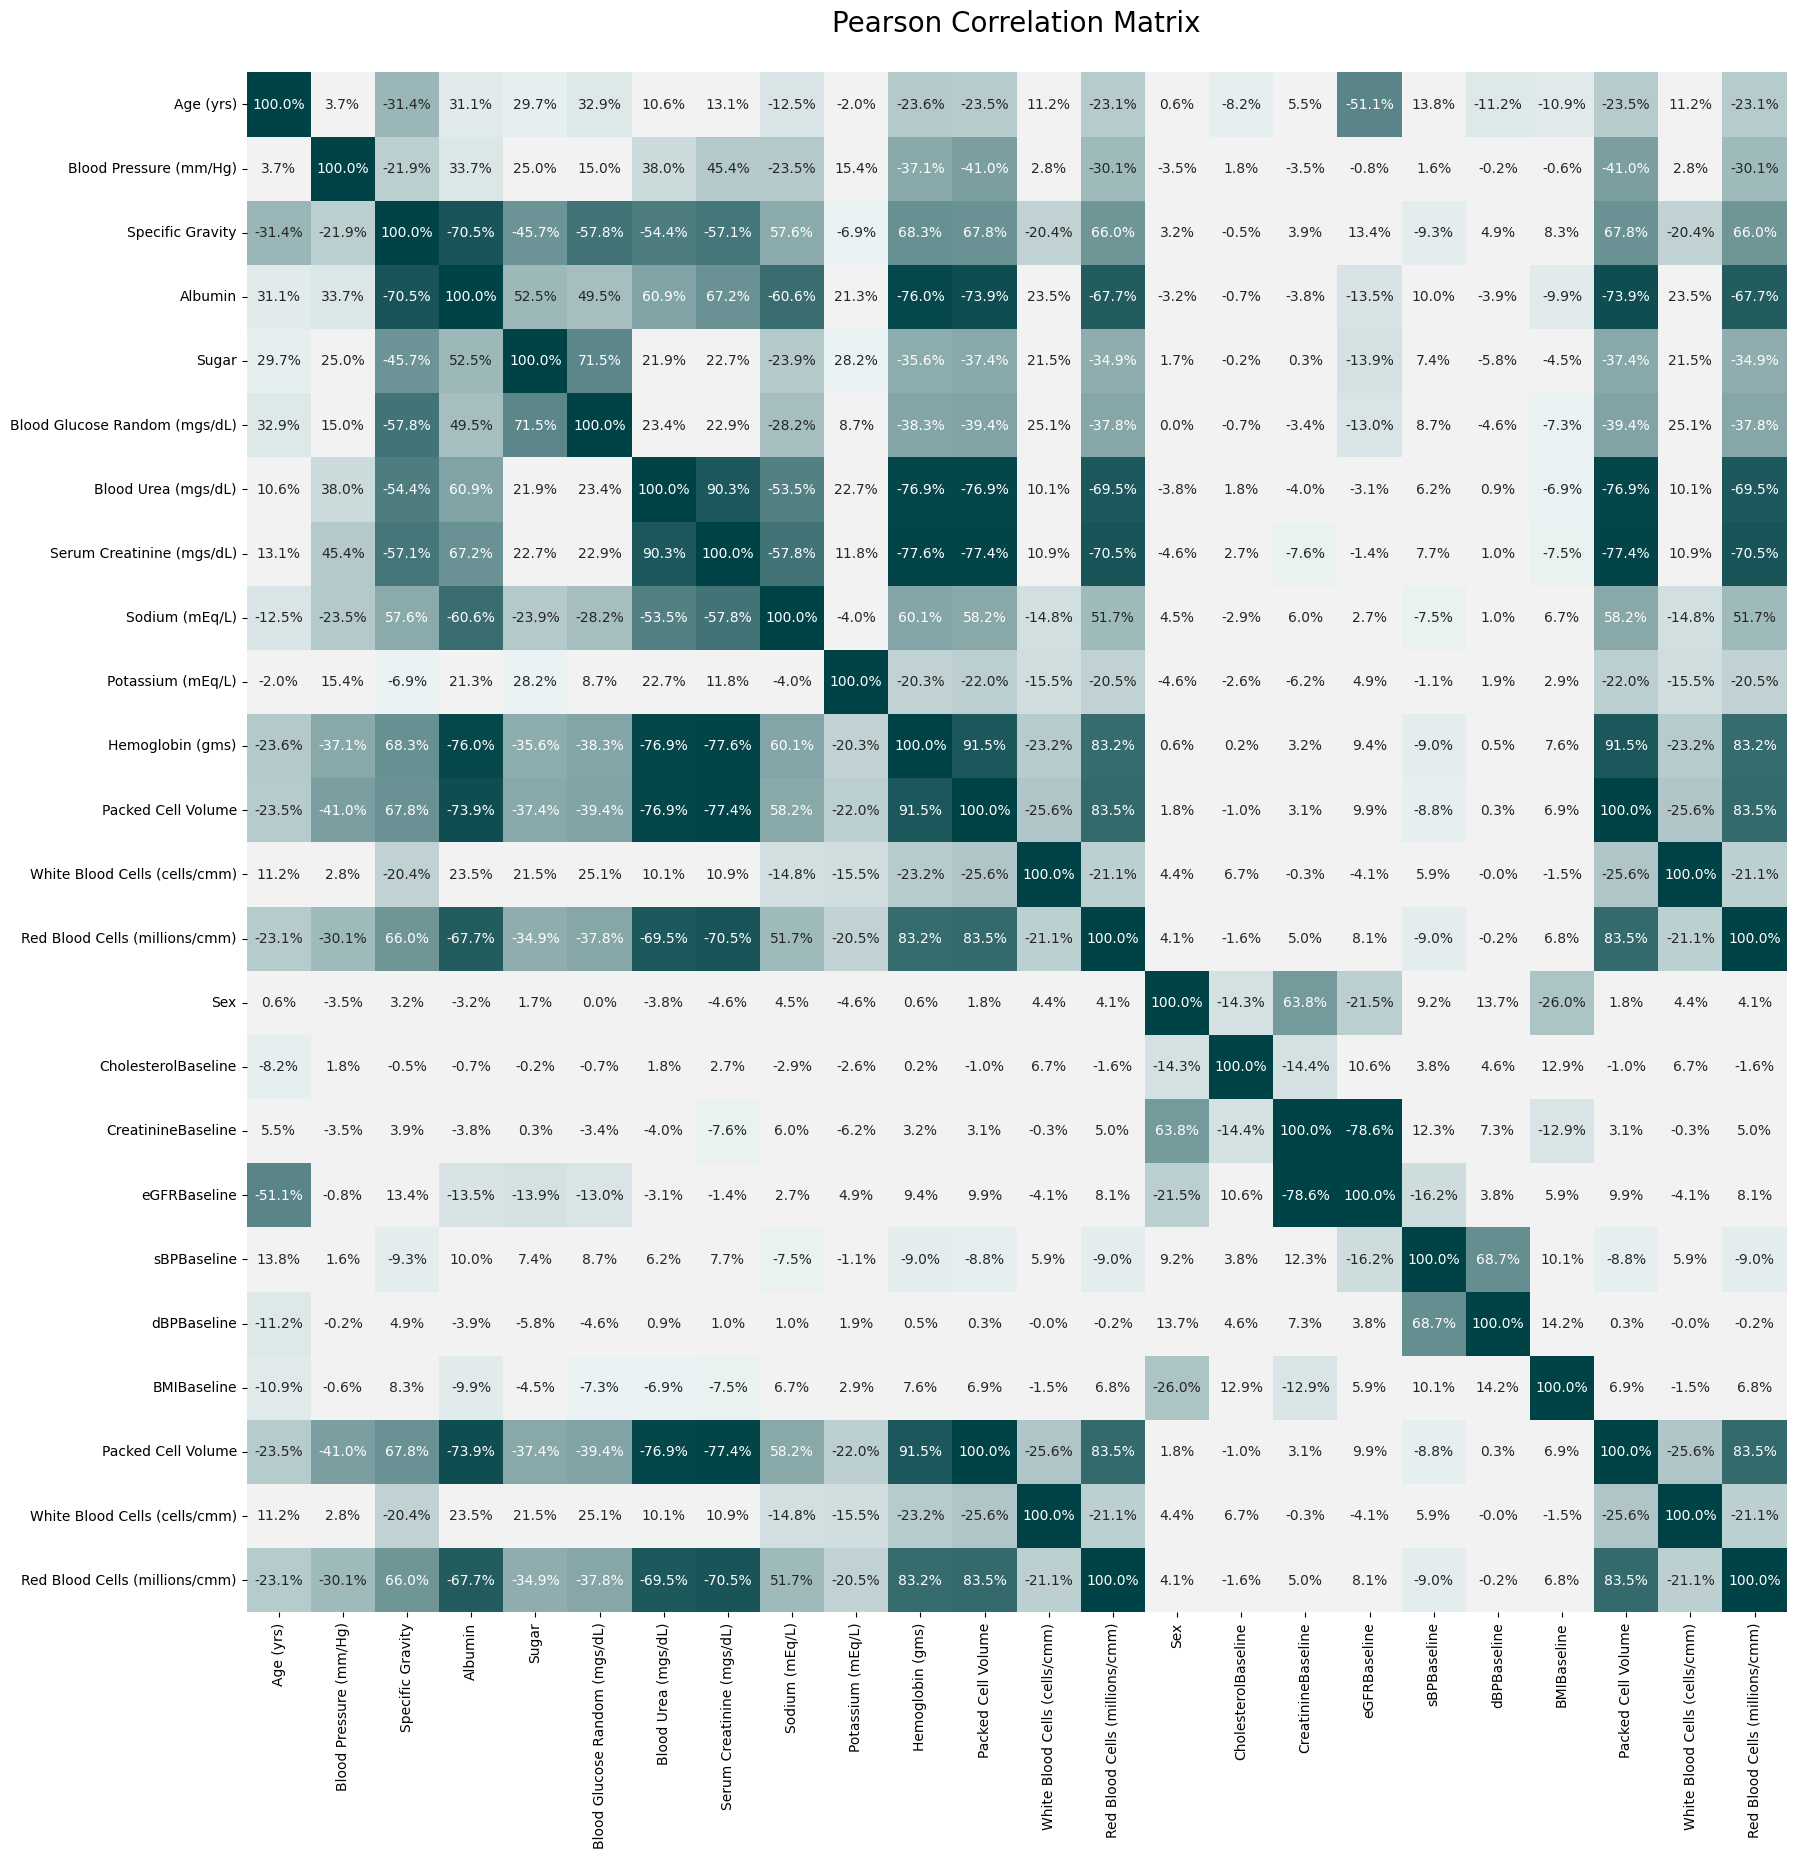

In [139]:
numeric_data= data[numeric]

plt.figure(figsize=(20, 20))

sns.heatmap(numeric_data.corr("pearson"),
            cmap=sns.diverging_palette(200, 200, s= 100, l= 25, as_cmap=True, sep=50),
            square= True,
            annot= True,
            annot_kws={'fontsize':10},
            fmt='.1%',
            cbar=False)

plt.title("Pearson Correlation Matrix\n", fontsize=20)
plt.show()

**Pearson Correlation**

Pearson correlation is a measure of how much two features are linearly dependent. It is calculated by dividing the covariance of the two variables by the product of their respective standard deviations. The value of Pearson correlation can range from -1 to 1.

- A correlation coefficient of 1 indicates a perfect positive linear relationship between the two features. This means that as one feature increases, the other feature also increases in a proportional manner.
- A correlation coefficient of -1 indicates a perfect negative linear relationship between the two features. This means that as one feature increases, the other feature decreases in a proportional manner.
- A correlation coefficient of 0 indicates no linear relationship between the two features.

It is important to note that correlation does not imply causation. Just because two features are correlated does not mean that one causes the other. For example, there is a strong correlation between ice cream sales and shark attacks. However, ice cream sales do not cause shark attacks. It is more likely that both ice cream sales and shark attacks are correlated with a third factor, such as hot weather.

**Exploring the Relationships between Features**

I can see a number of strong positive and negative correlations between the different features. For example, there is a strong positive correlation between blood glucose random and age. This means that as blood glucose random increases, so does age. There is also a strong negative correlation between blood urea nitrogen and specific gravity. This means that as blood urea nitrogen increases, specific gravity decreases.

It is important to explore these relationships in more detail to understand the underlying dynamics of the data. For example, you could look at scatterplots of the different features to see how they are related visually. We could also perform statistical tests to determine whether the relationships are statistically significant.

**Positive Correlation:**
- Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
- Sugar -> Blood glucose random
- Blood Urea -> Serum creatinine
- Hemoglobin -> Red Blood cell count <- packed cell volume

**Negative Correlation:**
- Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
- Serum creatinine -> Sodium

## CKD vs anemia

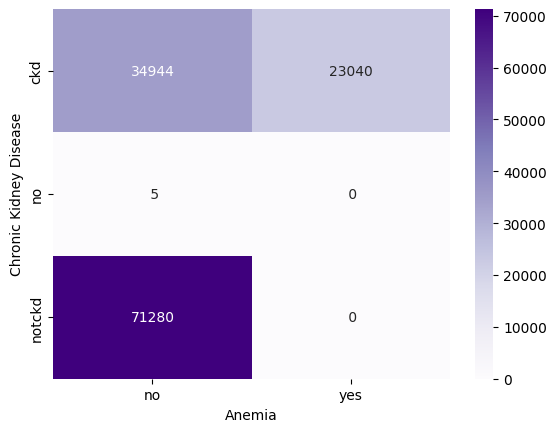

In [140]:
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Anemia']), cmap="Purples", annot=True, fmt='2')
plt.show()

we can say that if a patient does not have Chronic Kidney Disease (CKD), then they are very unlikely to have Anemia. This means that these two features are negatively correlated.

This is because CKD can damage the kidneys and reduce their ability to produce erythropoietin (EPO), a hormone that stimulates the production of red blood cells. Without enough EPO, the body cannot produce enough red blood cells, leading to anemia.

Therefore, the absence of CKD is a strong predictor of the absence of anemia. This relationship is likely to be causal, as CKD is a major risk factor for anemia.

## Packed Cell Volume vs Red Blood Cells

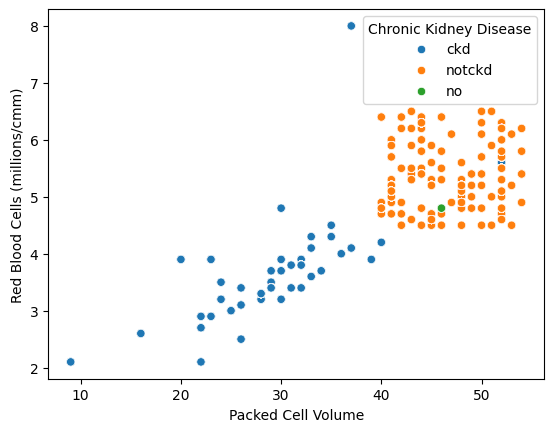

In [141]:
generate_scatter_plot( data, "Packed Cell Volume", 'Red Blood Cells (millions/cmm)')

The scatter plot provides several insights into the relationship between CKD, PCV and RBC:

- There is a strong correlation between CKD and PCV. This means that as CKD severity increases w.r.t PCV.
- PCV can be used to monitor CKD progression. A decrease in PCV over time may be a sign that CKD is worsening.
- PCV can be used to assess the severity of CKD. Patients with more severe CKD tend to have lower PCV levels.
- The best way to avoid CVD is to have a PCV value of 40 or above and red blood cell counts of above 5 million/cm^2.


## Red Blood Cells vs Hemoglobin

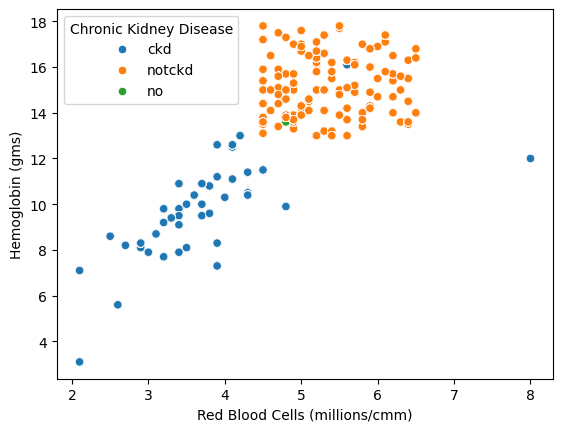

In [142]:
generate_scatter_plot(data, "Red Blood Cells (millions/cmm)", 'Hemoglobin (gms)')

## Hemoglobin vs Packed Cell Volume vs CKD

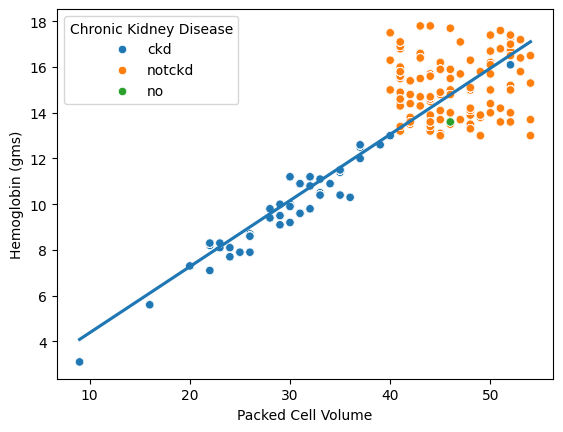

In [143]:
sns.scatterplot(data=data, y='Hemoglobin (gms)', x="Packed Cell Volume", hue="Chronic Kidney Disease")
sns.regplot(data=data, y='Hemoglobin (gms)', x="Packed Cell Volume", scatter=False, ax=plt.gca())
plt.show()

The scatter plot provides several insights into the relationship between CKD, PCV, RBC and Hemoglobin:

- There is a direct relationship between hemoglobin and packed cell volume (PCV). Hemoglobin is the protein in red blood cells that carries oxygen. PCV is the percentage of red blood cells in the blood.
- People with CKD tend to have lower hemoglobin and red blood cell counts than those without CKD. This is because CKD can damage the kidneys, which are responsible for producing red blood cells and erythropoietin, a hormone that stimulates red blood cell production.
- The RBC count range ~2 to <4.5 and hemoglobin between 3 to <13 are mostly classified as positive for CKD. This suggests that these values may be useful for identifying people who are at risk for CKD.

- RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for CKD.

- Hemoglobin > 13, mostly classified as not CKD

Therefore, a higher PCV value indicates a higher concentration of red blood cells, which in turn leads to a higher concentration of hemoglobin.

## Hemoglobin vs Pus Cell Clumps vs Anemia

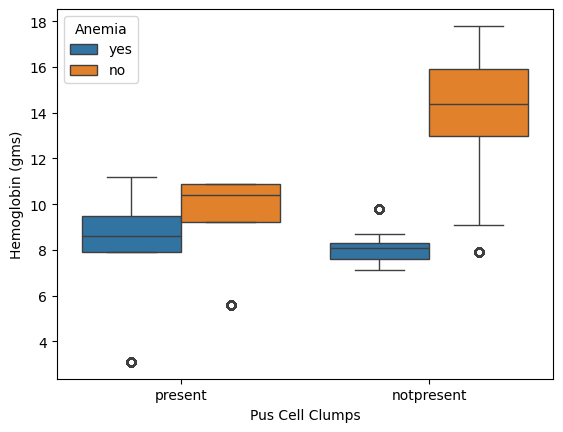

In [144]:
sns.boxplot(data=data, y='Hemoglobin (gms)', x="Pus Cell Clumps", hue="Anemia")
plt.show()

The boxplot you sent shows the relationship between pus cell clumps and hemoglobin (gms), colored by anemia.

- People with anemia tend to have lower hemoglobin levels than those without anemia.
- People with pus cell clumps tend to have lower hemoglobin levels than those without pus cell clumps.
- The relationship between pus cell clumps and hemoglobin is stronger in people with anemia than in those without anemia. This is likely because pus cell clumps can damage red blood cells and lead to anemia.
- Pus cell clumps can damage red blood cells, leading to anemia.
- Pus cell clumps can release inflammatory cytokines that can suppress red blood cell production.
- Pus cell clumps can compete with red blood cells for oxygen and nutrients.

## Red Blood Cells vs Albumin

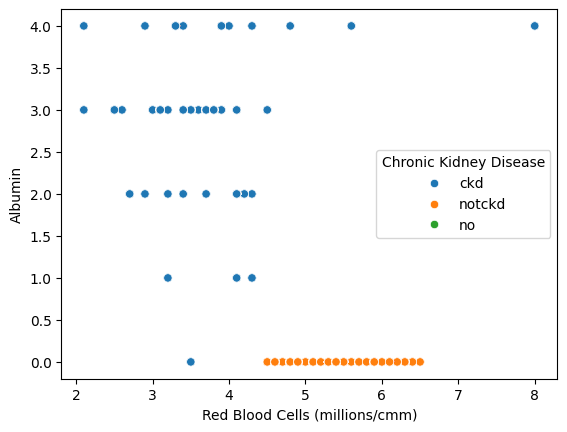

In [145]:
generate_scatter_plot(data, 'Red Blood Cells (millions/cmm)', "Albumin")


The scatter plot shows that the majority of people with CKD have RBC counts between 2 and 4.5 million/cmm and albumin levels between 1 and 4 gms. These values are mostly classified as positive for CKD.
Albumin is a protein produced by the liver that helps to maintain fluid balance and transport nutrients and hormones throughout the body.
CKD can damage the kidneys and reduce their ability to produce albumin.

## Packed Cell Volume vs Blood Urea

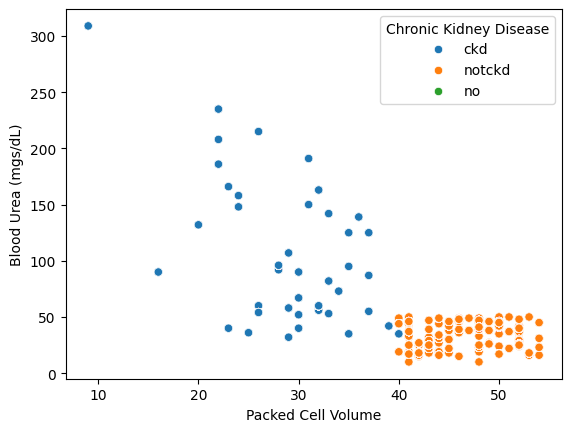

In [146]:
generate_scatter_plot(data, 'Packed Cell Volume', "Blood Urea (mgs/dL)")


## Hemoglobin vs Blood Urea

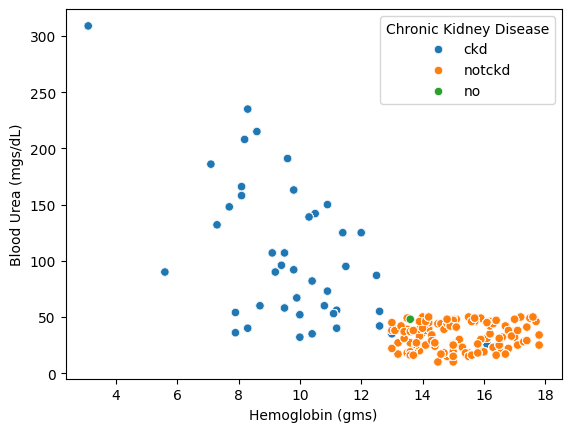

In [147]:
generate_scatter_plot(data, 'Hemoglobin (gms)', "Blood Urea (mgs/dL)")


The visualization indicates a discernible pattern where individuals diagnosed with CKD exhibit lower Packed Cell Volume (PCV) levels and Hemoglobin (gms), accompanied by elevated blood urea levels compared to those without CKD. This observation aligns with the understanding that CKD can adversely affect kidney function, leading to a reduction in red blood cell production and compromised filtration of waste products from the blood.

## Sodium vs Serum Creatinine

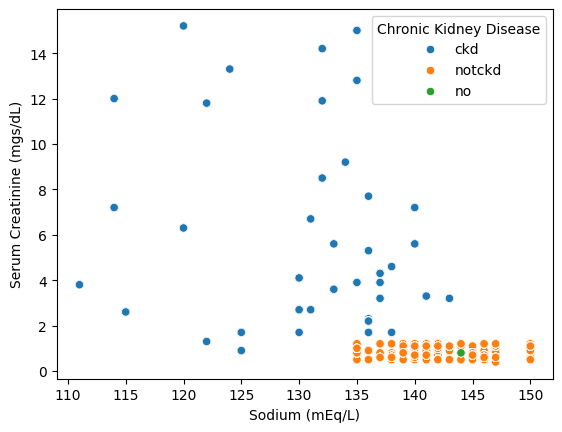

In [148]:
generate_scatter_plot(data, "Sodium (mEq/L)", 'Serum Creatinine (mgs/dL)')

CKD can damage the kidneys, which are responsible for filtering waste products from the blood, including sodium. When the kidneys are damaged, they may filter less sodium from the blood, leading to higher serum creatinine levels and lower sodium levels.

The scatter plot you sent shows a negative correlation between serum creatinine and sodium in people with chronic kidney disease (CKD). This means that as serum creatinine levels increase, sodium levels tend to decrease.

The scatter plot shows that the majority of people with CKD have serum creatinine levels between 1.4 and  mgs/dL and sodium levels between 125 and 145 mEq/L. These values are mostly classified as positive for CKD.

# Concluison

The data visualizations provided in this project help better understand patterns and correlations between features and Chronic Kidney Disease (CKD). Such findings contribute to knowledge on how various biomarkers can be employed to distinguish those who are at risk of CKD to improve diagnosis and initial management.



**Positive Correlations:**

The analysis reveals several positive correlations between key features. Notably, **Red Blood Cell (RBC) count, Packed Cell Volume (PCV), and Hemoglobin** levels exhibit a positive relationship, suggesting that individuals with higher RBC and PCV counts tend to have higher Hemoglobin levels. Additionally, **Blood Urea** and **Serum Creatinine** levels show a strong positive correlation. This indicates that both are critical markers in assessing kidney function and may be used together to evaluate kidney health. The close relationship between Hemoglobin, RBC count, and PCV highlights how these factors work together in oxygen transport, reinforcing their interconnectedness.

**Negative Correlations:**

In contrast, certain features show negative correlations, which may provide useful insights for diagnosing CKD. **Albumin** shows a negative correlation with **Blood Urea** and **RBC count, PCV, and Hemoglobin**, suggesting that CKD patients typically have lower red blood cell parameters. This could be due to the kidney's reduced ability to produce red blood cells as it deteriorates. Additionally, there is a negative correlation between **Serum Creatinine** and **Sodium**, indicating that as serum creatinine levels rise, sodium levels tend to decrease, which could reflect kidney dysfunction affecting electrolyte balance.

**Specific Findings:**

The dataset also highlights specific ranges that may be indicative of CKD. For instance, **RBC counts** between ~2 to <4.5 million/cmm and **Hemoglobin** levels ranging from 3 to <13 are primarily associated with a positive CKD classification, suggesting these markers may help in identifying at-risk individuals. Conversely, **Hemoglobin levels** above 13 tend to be classified as not having CKD, which may act as a threshold for distinguishing healthy individuals. Additionally, **PCV values of 40 or above** and **RBC counts above 5 million/cm²** are linked to a lower risk of CKD, suggesting that these values could serve as indicators of kidney health.

The presence of **pus cell clumps** has also been observed to potentially contribute to anemia in CKD patients, as those with pus cell clumps have lower hemoglobin levels compared to those without. Furthermore, individuals with CKD tend to show lower **Packed Cell Volume (PCV)** and **Hemoglobin** levels, alongside elevated **Blood Urea** levels, aligning with the understanding that CKD impairs kidney function and impacts both red blood cell production and waste product filtration.

**Reasons Behind the Findings:**

The observed correlations can be explained by understanding the biological processes involved in CKD. **Red Blood Cell count, Packed Cell Volume, and Hemoglobin** are interrelated because RBCs contain hemoglobin, and PCV represents the percentage of red blood cells in the blood. Thus, higher RBC and PCV naturally lead to higher Hemoglobin levels. Similarly, both **Blood Urea** and **Serum Creatinine** are waste products filtered by the kidneys, and their levels rise when kidney function declines, which explains their positive correlation.

The negative correlations involving **Albumin**, **Blood Urea**, and **Red Blood Cell Count** can be attributed to the kidney’s reduced capacity to filter and produce red blood cells and albumin in the presence of CKD. Moreover, high **Blood Urea** levels may be toxic to red blood cell production, contributing to the observed negative correlation. **Serum Creatinine** and **Sodium** show a negative relationship because CKD impairs the kidneys' ability to filter sodium, leading to elevated serum creatinine levels and a decrease in sodium levels in the blood.

**Finally:**

These findings underscore the importance of utilizing data-driven insights, such as those derived from visualizations, to enhance diagnostic efficiency for early CKD detection. By analyzing relationships between clinical features and the presence of CKD, healthcare professionals can identify patterns that assist in making informed decisions, ultimately improving patient care and outcomes.

# **THANK YOU FOR READING**